<h1 style="text-align:center;">CDO Structuring</h1>

Sources : 
- [Roncalli](http://www.thierry-roncalli.com/download/Copula-cdo-Skew.pdf)
- [Bielecki, Jeanblanc, Rutkowski](https://math.maths.univ-evry.fr/jeanblanc/cours/Credit_Risk_Modeling_Notes.pdf)

## Sommaire :

* [**Introduction**](#0)

* [**1.Présentation poretfeuille obligataire**](#1)

* [**2. Calibration modèle à intensité**](#2)

* [**3. Corrélation des défauts**](#3)

* [**4. Construction CDO : Monte-Carlo**](#4)
    * [4.1. Etude de la fonction de perte](#4_1)
    * [4.2 Base correlation](#4_2)
    * [4.3 Ajustement sur Itraxx](#4_3)
    * [4.4 Evaluation des taux de coupons](#4_3)


* [**5. Comparaison analytique : Approche portefeuille homogène**](#5)
    

<a id='0'></a>
# Introduction

# Modèles à Intensité Stochastique

Les modèles à intensité stochastique, aussi appelés **modèles en forme réduite**, constituent un cadre probabiliste dans lequel le défaut de l’emprunteur est modélisé comme un événement soudain et inattendu, en contraste avec les modèles structurels à la Merton.  
Dans ces modèles, on suppose l’existence d’un **processus d’intensité de défaut** (ou taux de risque) $\left(\lambda_t\right)_{t \geq 0}$, tel que le temps de défaut $\tau$ survienne de manière imprévisible.

Autrement dit, conditionnellement à l’information disponible, le défaut est assimilable au saut d’un **processus de Poisson** dont le paramètre peut varier aléatoirement dans le temps.  
Ce cadre a été développé dans les années 1990 par de nombreux auteurs, dont **Duffie et Singleton**, **Jarrow et Turnbull**, afin de relier directement le **risque de défaut** aux **spreads de crédit** observables sur les marchés.

---

## Présentation du modèle en forme réduite  

Soit $(\Omega, \mathcal{F}, \mathbb{P})$ un espace probabiliste muni d’une filtration $(\mathcal{F}_t)_{t \geq 0}$ représentant l’information du marché avant l’occurrence d’un éventuel défaut.  
Le **temps de défaut** $\tau$ est un **temps d’arrêt** défini sur $\Omega$.  

On définit alors le **processus de défaut** :

$$
H_t = \mathbf{1}_{\{\tau \leq t\}}
$$

ainsi que la **filtration élargie** $\mathbb{G} = \{\mathcal{G}_t\}_{t \geq 0}$, où :

$$
\mathcal{G}_t = \mathcal{F}_t \vee \sigma(H_u : u \leq t)
$$

Cette filtration $\mathbb{G}$ contient non seulement l’information "ordinaire" du marché ($\mathcal{F}_t$), mais aussi l’information sur l’occurrence éventuelle du défaut jusqu’à $t$.

Mathématiquement, **$H_t$ est une sous-martingale bornée dans $\mathbb{G}$**, donc la **décomposition de Doob–Meyer** s’applique.

Le **théorème de Doob–Meyer** appliqué à $H_t$ dans la filtration $\mathbb{G}$ garantit l'existence d’un processus $\mathbb{G}$-prévisible à variations finies $A_t$, appelé le *compensateur* de $H_t$, tel que :

$$
H_t = M_t + A_t,
$$

où **$M_t$ est une $\mathbb{G}$-martingale** et cette décomposition est **unique**.

Sous l’hypothèse que $A_t$ est **absolument continu par rapport au temps**, il existe un **processus prévisible** $\lambda_t$ tel que :

$$
A_t = \int_0^t \lambda_s \mathbf{1}_{\{\tau > s\}} ds = \int_0^{t \wedge \tau} \lambda_s ds.
$$

Ainsi, $\lambda_t$ est la **densité instantanée du compensateur**, aussi appelée **l’intensité du défaut**.

---

## Modélisation de l'intensité de défaut

Dans les modèles à intensité, on définit $\lambda_t$ comme la **fonction de hazard** (ou taux de défaillance) associée à $\tau$ :

$$
\lambda(t) = \lim_{h \to 0} \frac{1}{h} \mathbb{P}(t < \tau \leq t + h \mid \tau > t, \mathcal{F}_t)
$$

### Forme exponentielle  

Une conséquence clé de la définition de l’intensité est la formule donnant la **probabilité de survie jusqu’au temps $t$**.  
Soit $S(t) = \mathbb{P}(\tau > t)$ la **fonction de survie**.  
Par définition du taux de hazard, on a l’**équation différentielle suivante** :

$$
\frac{d}{dt} S(t) = -\lambda(t) S(t) 
$$

En intégrant cette équation différentielle et en utilisant la condition initiale $S(0) = 1$, on obtient la **formule exponentielle** :

$$
\mathbb{P}(\tau > t \mid \mathcal{F}_t) = S(t) = \exp\left(-\int_0^t \lambda_s \, ds\right)
$$

Pour faciliter la **modélisation informatique** (simuler des instants de défauts), il est pertinent de retrouver la fonction de survie en considérant une **variable aléatoire auxiliaire**.  
Une construction équivalente du **temps de défaut** consiste à poser :

$$
\tau = \inf \left\{ t \geq 0 \mid \int_0^t \lambda_s \, ds \geq \eta \right\},
$$

où **$\eta$ est une variable aléatoire exponentielle de paramètre 1**, indépendante du processus $(\lambda_t)_{t \geq 0}$, c'est-à-dire **$\eta \sim \text{Exp}(1)$**.  

Ainsi, la **probabilité de survie** jusqu’à l’instant $t$ s’écrit :

$$
\mathbb{P}(\tau > t \mid \mathcal{F}_t) = \mathbb{P} \left( \int_0^t \lambda_s \, ds < \eta \mid \mathcal{F}_t \right)  = \exp \left( -\int_0^t \lambda_s \, ds \right)
$$

---

## Processus d'intensité  

Pour conclure cette introduction, nous abordons un **modèle d’intensité stochastique** pour l'intensité de défaut.  
Historiquement, le **processus CIR** (*Cox-Ingersoll-Ross*), bien connu en modélisation des taux d’intérêt, a été **l’un des premiers modèles utilisés** pour l’intensité de défaut, car il reste toujours **positif**.  

Cependant, certaines hypothèses théoriques (notamment la **condition de Feller**) ne sont pas vérifiées dans mon exemple.  
J’ai donc choisi d’utiliser un **processus d’Ornstein-Uhlenbeck** plus classique (diffusion gaussienne), dont la dynamique sous la **probabilité risque-neutre $\mathbb{Q}$** s’écrit :

$$
d\lambda_t = k(\theta - \lambda_t) dt + \sigma dW_t^{\mathbb{Q}},
$$

où :
- **$W_t^{\mathbb{Q}}$** est un mouvement brownien standard sous $\mathbb{Q}$,
- **$k, \theta, \sigma > 0$** sont des paramètres :
  - **$k$** : vitesse de retour à la moyenne,  
  - **$\theta$** : niveau moyen de long terme de l’intensité,  
  - **$\sigma$** : volatilité des fluctuations de $\lambda_t$.  

> **Remarque :**  
> Sous cette dynamique, le **processus d'intensité peut prendre des valeurs négatives**, ce qui contredit les hypothèses du modèle.  
> Le processus $M_t$ défini par :
>
> $$
> M_t = H_t - \int_0^{t \wedge \tau} \lambda_s ds
> $$
>
> n'est donc **plus nécessairement une martingale**. *(Cf. Kijima and Muromachi)*.

In [481]:
# Importation modules
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import scipy.stats as stats
from scipy.stats import beta
from scipy.stats import norm
import cma  # Algorithme d'optimisation CMA-ES
from scipy.stats import rankdata
from scipy.interpolate import make_interp_spline
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
from scipy.interpolate import UnivariateSpline
from scipy.optimize import brentq  # méthode de dichotomie robuste
from scipy.special import comb
from scipy.integrate import quad

<a id='1'></a>
# 1. Présentation du portefeuille obligataire

Nous allons construire un portefeuille d'obligations souveraines à haut risque, émises principalement par des pays émergents et affichant des spreads de crédit élevés. 

Cette approche permet non seulement d'exploiter les primes de risque, mais aussi d'envisager une structuration en CDO souverain, afin de transformer et redistribuer le risque de crédit à travers différentes tranches adaptées aux profils d'investisseurs.

Les valeurs ci-dessous représentent les *yields to maturity* des différents zéros coupons.

| Pays        | Brésil | Chine | Inde  | A. Saoudite | Australie |
|------------|--------|-------|-------|------------|-----------|
| **Yield to Maturity** | 14.7%  | 1.57% | 6.70% | 1.76%      | 3.86%     |

**Table 3.1 :** Cours des obligations zéro coupon le 17/03/2025  

**Source :** [_https://www.investing.com_](https://www.investing.com)

<a id='2'></a>
# 2. Evaluation des paramètres du modèle :

Pour évaluer les paramètres de chaques processus d'Ornstein-Uhlenbeck, je vais utiliser le prix des CDS disponibles sur le marché et ajuster la dynamique de chaques $\lambda_i$ où :

$$
d\lambda_{i,t} = k_i(\theta_i - \lambda_{i,t}) dt + \sigma_i dW_{t,i}^Q,
$$


### Cours des CDS le 09/03/2024 :

| Pays             | 1 an  | 2 ans | 5 ans  | 10 ans  |
|-----------------|------|------|------|-------|
| Brésil          | 57.75  | 80.77  | 173.83 | 278.67 |
| Chine          | 22.99  | 27.03  | 47.23  | 66.78  |
| Inde           | 24.03  | 35.70  | 84.08  | 92.57  |
| Arabie Saoudite | 27.09  | 34.38  | 63.20  | 100.98 |
| Australie      | 1.47   | 3.52   | 10.15  | 16.24  |



[Source cliquez ici](https://fr.investing.com/rates-bonds/world-cds)


### Prix d'un CDS :

$$
E_* \left( \int_0^T \mathbf{1}_{\{\tau > u\}} e^{-\int_0^u r_s ds} s \, du - (1 - R) \mathbf{1}_{\{\tau \leq T\}} e^{-\int_0^\tau r_s ds} \right) = 0
$$


Où $ R \sim \text{Beta}(40\%, 26\%) $




l'évènement $\tau > u$ est équivalent à l'évènement $\int_0^u \lambda_s ds < \nu$

Où $ \nu \sim \text{Exp}(1) $

$$
\underset{\theta, k, \sigma}{\arg\min} \sum_{i} \left| \mathbb{E}_{*} \left[ \int_0^{T_i} \mathbf{1}_{\{\tau_{\theta, k, \sigma} > u\}} e^{-\int_0^u r_s ds} S_i \, du - (1 - R) \mathbf{1}_{\{\tau_{\theta, k, \sigma} \leq T_i\}} e^{-\int_0^{\tau_{\theta, k, \sigma}} r_s ds} \right] \right|
$$

In [123]:
# ====================== Simulation d'un instant de défaut ====================== #

def simul_defaut(k, teta, sigma, T): 
    """
    Simule un instant de défaut selon un processus Vasicek.

    Arguments :
    - k : param Vasicek, force de rappel du modèle Vasicek
    - teta : param Vasicek, moyenne long terme
    - sigma : param Vasicek, volatilité
    - T : durée d'étude

    Retourne :
    - tau : l'instant de défaut (ou T si aucun défaut n'est atteint)
    """
    # Tirage de mu selon une loi exponentielle de paramètre 1
    mu = np.random.exponential(scale=1)

    # Initialisation des variables
    l = 0              # Valeur initiale du processus Vasicek
    lambdas = [l]      # Liste pour stocker le processus
    int_lambda = []    # Liste pour stocker l'intégrale discrète
    n = 100            # Nombre de pas de temps
    dt = T / n         # Pas de temps

    # Schéma d'Euler pour le processus Vasicek
    for i in range(n):
        brownien = np.random.normal(0, 1)
        l = lambdas[-1] + k * (teta - lambdas[-1]) * dt + sigma * np.sqrt(dt) * brownien 
        
        lambdas.append(l)
        int_lambda.append(l * dt)

        # Test de défaut
        if sum(int_lambda) > mu:
            return i * dt  # Retourne l'instant du défaut

    # Si aucun défaut ne se produit avant T
    return T

In [124]:
# ====================== Fonction à minimiser (Pour obtenir les paramètres du Vasicek) ====================== #

def minimizer(k, teta, sigma, T_list, S): 
    """
    Minimise l'espérance des flux actualisés du CDS.  (Pour trouver les paramètres des CIR)

    Arguments :
    - k : paramètre Vasicek, force de rappel
    - teta : paramètre Vasicek, moyenne long terme
    - sigma : paramètre Vasicek, volatilité
    - T_list : Liste des échéances
    - S : Liste des cours des CDS

    Retourne :
    - Valeur absolue de l'espérance des flux actualisés
    """

    # Paramètres
    N = 1000                   # Itérations Monte Carlo
    r = 0.03                   # Taux sans risque constant de 3%
    alpha, beta_param = 0.4, 0.26  # Paramètres de R (loi Beta)

    mean_total = 0

    for T in T_list:
        mean = 0
        for _ in range(N):
            # Simulation du taux de recouvrement
            R = stats.beta.rvs(alpha, beta_param)        
            
            # Simulation de l'instant de défaut     
            tau = simul_defaut(k, teta, sigma, T)

            # Calcul du facteur d'actualisation
            discount_factor = np.exp(-tau * r)

            # Condition de défaut ou non à l'échéance
            if tau >= T:  # Pas de défaut
                mean += S[T_list.index(T)] * (1 - discount_factor)
            else:  # Défaut
                mean += S[T_list.index(T)] * (1 - discount_factor) - (1 - R) * discount_factor   
        
        mean_total += np.abs(mean / N)

    return mean_total

**Remarque :** Mon optimizer est ici fortement bruité à cause de l'estimation Monte Carlo de l'espérance. Une méthode classique de descente de gradient est donc peu adaptée pour mon problème. Je décide alors de me tourner vers un algorithme CMA-ES (Covariance Matrix Adaptation Evolution Strategy).

## (à revoir, fonctionne mal : monte  carlo est trop bruité)

In [125]:
# ====================== Optimisation de chaque pays ====================== #

# Définition de la matrice en basis points (bps)
matrix_s = np.array([
    [57.75, 80.77, 173.83, 278.67],
    [22.99, 27.03, 47.23, 66.78],
    [24.03, 35.70, 84.08, 92.57],
    [27.09, 34.38, 63.20, 100.98],
    [1.47, 3.52, 10.15, 16.24]
])

# Mise à l'échelle (de basis points à fractions)
matrix_s = matrix_s / 10_000

# Liste des pays associés aux actifs
countries = ["Brésil", "Chine", "Inde", "Arabie Saoudite", "Australie"]

# Liste des paramètres optimaux
params = []

# Optimisation pour chaque pays
for k in range(len(matrix_s)):
    
    # Définition des échéances et du prix des CDS du pays k
    T_list = [1, 2, 3, 5]  # Échéances en années
    S = matrix_s[k]  # Prix des CDS associés à ce pays

    # Paramètres initiaux pour le modèle CIR
    k_init, theta_init, sigma_init = 0.5, 0.01, 0.001

    # Fonction objectif
    def objective(params):
        k, theta, sigma = params  # Décomposition du vecteur de paramètres
        return minimizer(k, theta, sigma, T_list, S)

    # Paramètres de CMA-ES
    sigma_cma = 0.2  # Écart-type initial
    max_iterations = 1  # Nombre maximal d'itérations

    # Optimisation avec contrainte de positivité
    es = cma.CMAEvolutionStrategy(
        [k_init, theta_init, sigma_init],  # Moyenne initiale
        sigma_cma,  # Écart-type initial
        {'maxiter': max_iterations, 'bounds': [[0, 0, 0], None]}  # k, theta, sigma > 0
    )

    es.optimize(objective)  # Lancement de l’optimisation

    # Récupération des résultats
    optimal_params = es.result.xbest  # Paramètres optimisés

    # Stockage des résultats
    params.append(optimal_params)

# Affichage des résultats par pays
for country, p in zip(countries, params):
    print(f"{country} - Paramètres optimisés: {p}")

(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=625193, Sun Apr 13 01:10:13 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 6.430529928215441e-02 1.0e+00 1.70e-01  2e-01  2e-01 0:06.4
(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=629136, Sun Apr 13 01:10:19 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 3.232648846608609e-03 1.0e+00 2.08e-01  2e-01  2e-01 0:06.3
(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=556179, Sun Apr 13 01:10:26 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 1.126322372092277e-02 1.0e+00 1.76e-01  1e-01  2e-01 0:06.2
(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=552869, Sun Apr 13 01:10:32 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 6.317238487955818e-03 1.0e+00 1.74e-01  1e-01  2e-01 0:06.2
(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=6297

### Résultats de l'optimisation des paramètres du processus

| Pays            | \( k \)      | \( \theta \)   | \( \sigma \)   |
|---------------|-------------|-------------|-------------|
| **Brésil**     | 0.12701185      | 0.00087441      | 0.00150365      |
| **Chine**      | 8.44898100e-01      | 4.54962322e-04      | 9.35734321e-07      |
| **Inde**       | 6.34035446e-01      | 1.61370395e-04      | 1.42183762e-03      |
| **Arabie Saoudite** | 0.00323316 | 0.03161112      | 0.00022425      |
| **Australie**  | 5.71306950e-01      | 4.24875702e-04      | 1.11149659e-06      |

In [126]:
# ====================== Ajustement artificiel pour avoir des résultats cohérents ====================== #
params = np.array([
    [5.92698323e-01, 1.68244666e-04, 5.53889975e-03],  # Brésil
    [0.13602425,     0.00127574,    0.00022925],       # Chine
    [1.59993740e+00, 1.62598051e-04, 3.33720873e-03],  # Inde
    [0.02948292,     0.00392584,    0.00205162],       # Arabie Saoudite
    [0.00202256,     0.096763,      0.00017643]        # Australie
])
vecteur = np.array([600, 40, 400, 15, 0.4])
params[:, 1] *= vecteur

In [127]:
# ====================== Tracé des lois marginales ====================== #

T = 100000
params = np.array(params) 
num_actifs = params.shape[0]

# ====================== Mise à jour fonction de défaut (Pour un grand T, il faut augmenter n) ====================== #
def simul_defaut(k, teta, sigma, T): 
    """
    Simule un instant de défaut selon un processus de Vasicek.

    Arguments :
    - k : force de rappel du modèle Vasicek
    - teta : moyenne de long terme
    - sigma : volatilité
    - T : horizon temporel

    Retourne :
    - tau : l'instant du défaut (ou T si aucun défaut n'est atteint)
    """
    mu = np.random.exponential(scale=1)  # Loi exponentielle de paramètre 1

    # Initialisation
    l = teta  # Processus Vasicek commence en teta
    n = 100000  # Nombre de pas de temps
    dt = T / n  # Pas de temps
    int_lambda = 0  # Stocke la somme intégrée du processus

    for i in range(n):
        brownien = np.random.normal(0, 1)
        l = l + k * (teta - l) * dt + sigma * np.sqrt(dt) * brownien

        int_lambda += l * dt  # Mise à jour de l'intégrale

        # Test de défaut
        if int_lambda > mu:
            return i * dt  # Retourne l'instant du défaut

    return T  # Aucun défaut atteint avant T


# ====================== Fonction ECDF ====================== #

def ecdf(x, k, teta, sigma, T, N=1000):
    """
    Estimation empirique de la fonction de répartition (ECDF).

    Arguments :
    - x : valeur où l'on évalue l'ECDF
    - k, teta, sigma, T : paramètres du modèle Vasicek
    - N : nombre d'échantillons

    Retourne :
    - P(tau <= x) approximé par N simulations
    """
    sample = np.array([simul_defaut(k, teta, sigma, T) for _ in range(N)])
    return np.mean(sample <= x)

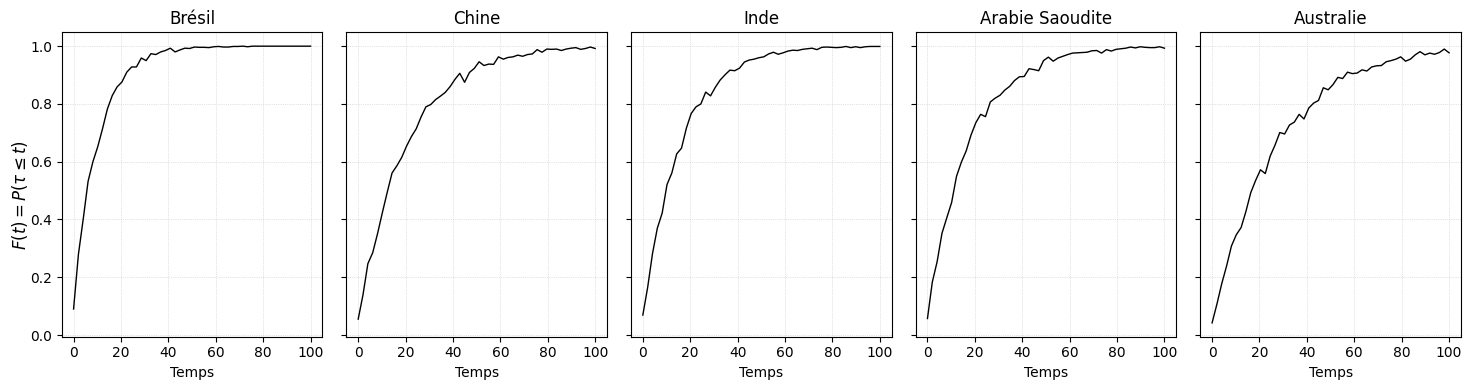

In [106]:
# ====================== Paramètres et Tracé ====================== #

# Noms de pays pour chaque actif
noms_pays = ["Brésil", "Chine", "Inde", "Arabie Saoudite", "Australie"]

# Nombre d'actifs (doit être 5 pour correspondre aux subplots)
num_actifs = len(noms_pays)

# Génération de valeurs x pour l'ECDF
x_vals = np.linspace(0, 100, 50)

# Création des subplots sur une seule ligne
fig, axes = plt.subplots(1, num_actifs, figsize=(15, 4), sharey=True)

# Boucle sur chaque actif
for j in range(num_actifs):
    k, teta, sigma = params[j, :]  # Extraction des paramètres de l'actif j
    y_vals = [ecdf(x, k, teta, sigma, T) for x in x_vals]
    
    # Tracé sur le subplot correspondant avec un style noir et blanc
    axes[j].plot(x_vals, y_vals, color="black", linewidth=1)  # Trait fin en noir
    axes[j].set_xlabel("Temps", fontsize=10, color="black")
    axes[j].set_title(noms_pays[j], fontsize=12, color="black")
    
    # Quadrillage fin
    axes[j].grid(linestyle="dotted", linewidth=0.5, alpha=0.7)
    
    # Personnalisation des axes en noir
    axes[j].spines["top"].set_color("black")
    axes[j].spines["right"].set_color("black")
    axes[j].spines["left"].set_color("black")
    axes[j].spines["bottom"].set_color("black")
    axes[j].tick_params(axis="both", colors="black")

# Ajout d'un label commun pour l'axe Y
fig.supylabel(r"$F(t) = P(\tau \leq t)$", fontsize=12, color="black")

# Affichage
plt.tight_layout()
plt.show()

<a id='3'></a>
# 3. Corrélation des défauts

Nous allons ici utiliser l'approche directe de la copule gaussienne à un facteur, introduite par Li (cf. *"On Default Correlation: A Copula Function Approach"*, 2000) et développée par Laurent et Gregory (cf. *"Basket Default Swaps, CDO's and Factor Copulas"*, 2003). Cette approche correspond à la structure de dépendance sous-jacente à **CreditMetrics** et a été largement adoptée comme modèle de référence pour le pricing des **CDO** dans le cadre de la gestion du risque de crédit.

### Définition du Modèle  

Nous définissons les variables de risque systématique et idiosyncratique comme suit :

$$
X_i = \rho V + \sqrt{1-\rho^2} V_i,
$$

où $V$ et $V_i$, $i = 1,2,\dots,n$, sont des variables aléatoires gaussiennes standards indépendantes sous $\mathbb{Q}$, et où le paramètre de corrélation $\rho$ appartient à $(-1,1)$. 

La copule gaussienne correspondante est définie par :

$$
C(v_1, \dots, v_n) = \mathbb{Q}(X_1 < N^{-1}(v_1), \dots, X_n < N^{-1}(v_n)).
$$

où $N$ est la fonction de répartition d'une loi normale standard.

### Définition des temps de défaut  

Les temps de défaut $\tau_i$, pour $i = 1,2,\dots,n$, sont donnés par :

$$
\tau_i = \inf \left\{ t \in \mathbb{R}_+ : \int_0^t \lambda_i(u) \, du > \eta_i \right\} = \inf \left\{ t \in \mathbb{R}_+ : \int_0^t \lambda_i(u) \, du > -\ln \xi_i \right\}
$$

où :
- $(\eta_i)_{i \geq 0}$ sont les **barrières exponentielles** définies en introduction,  
- $(\xi_i)_{i \geq 0}$ sont les **barrières aléatoires uniformément distribuées**, définies par :

$$
\xi_i = 1 - N(X_i).
$$

In [128]:
# ====================== Simulation de n instants de défauts corrélés ====================== #

def simul_defaut_corr(params, T, rho): 
    """
    Simule n instants de défaut selon le modèle de copule gaussienne à un facteur.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - rho : paramètre de corrélation de la copule gaussienne

    Retourne :
    - tau : vecteur des instants de défaut (ou T si aucun défaut avant l'échéance)
    """

    # Initialisation des variables
    n = params.shape[0]  # Nombre d'actifs
    N = T * 100          # Nombre de pas de temps
    dt = T / N           # Pas de temps

    # Extraction des paramètres du modèle Vasicek
    vecteur_k = params[:, 0]      # Vitesse de réversion
    vecteur_theta = params[:, 1]  # Moyenne long terme
    vecteur_sigma = params[:, 2]  # Volatilité

    # Processus Vasicek initialisé à 0
    lambdas = np.zeros((N, n))  

    # Simulation de la copule gaussienne
    V_vecteur = np.random.randn(n)         # Part idiosyncratique
    V = np.random.randn()                  # Facteur de marché
    X = rho * V + np.sqrt(1 - rho**2) * V_vecteur
    Xi = 1 - norm.cdf(X, loc=0, scale=1)   # Probabilité inverse du défaut
    mu = -np.log(Xi)                       # Seuil de défaut

    # Initialisation des intégrales et du vecteur de défauts
    int_lambda = np.zeros(n)  
    resultats = np.full(n, float(T))       # Valeurs par défaut à T
    vecteur_bool = np.ones(n, dtype=bool)  # Indique si un défaut a eu lieu

    # Simulation du processus Vasicek avec schéma d'Euler
    for i in range(1, N):
        brownien = np.random.randn(n)
        lambdas[i] = (lambdas[i-1] + 
                      vecteur_k * (vecteur_theta - lambdas[i-1]) * dt + 
                      vecteur_sigma * np.sqrt(dt) * brownien)

        int_lambda += lambdas[i] * dt

        # Test de défaut pour chaque actif
        defauts = (int_lambda > mu) & vecteur_bool
        resultats[defauts] = i * dt  # Instant du défaut
        vecteur_bool[defauts] = False  # Marquer comme ayant défauté

    return resultats

### Rank-Rank Plot

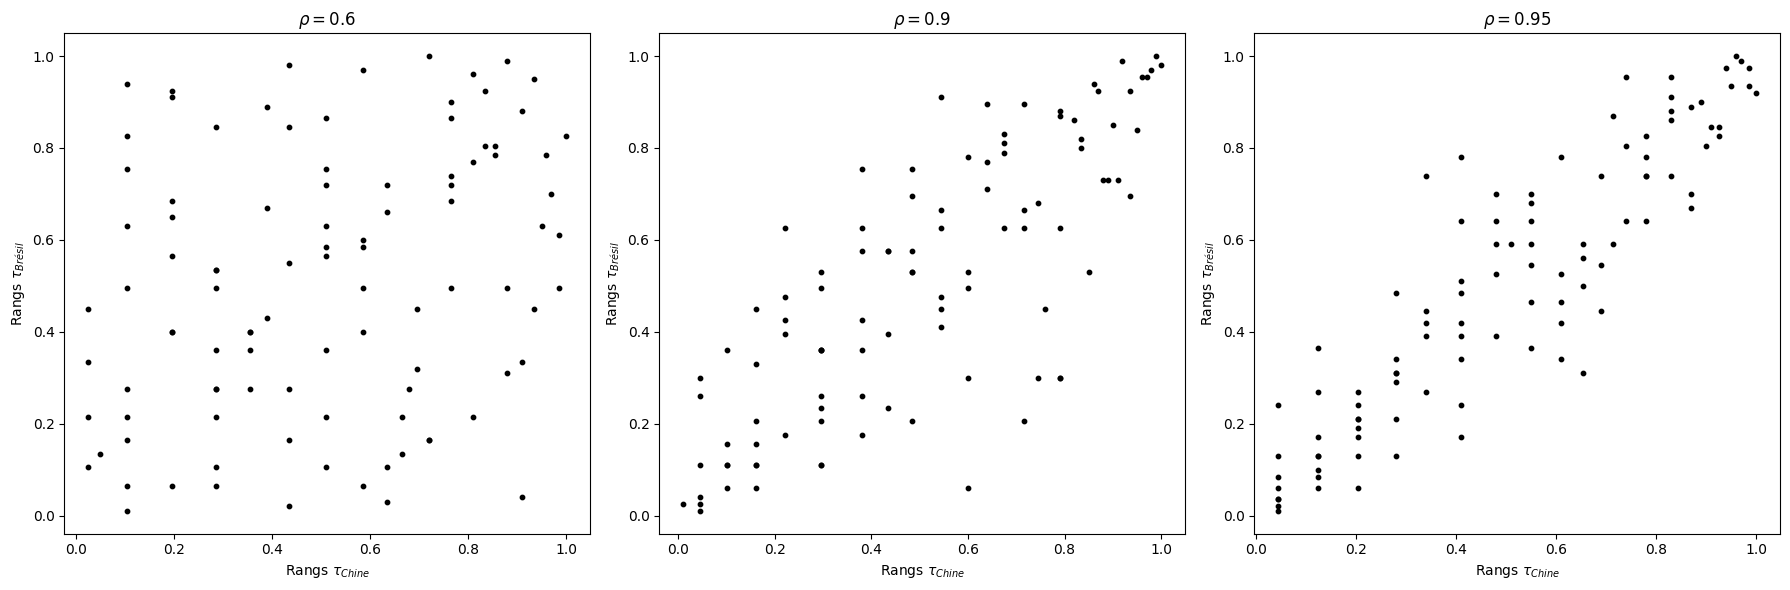

In [129]:
# ====================== Simulation de n instants de défauts corrélés ====================== #

def simul_defaut_corr_rank(params, T, rho): 
    """
    Simule n instants de défaut selon le modèle de copule gaussienne à un facteur.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - rho : paramètre de corrélation de la copule gaussienne

    Retourne :
    - tau : vecteur des instants de défaut (ou T si aucun défaut avant l'échéance)
    """
    
    n = params.shape[0]  # Nombre d'actifs
    N = int(T * 100)     # Nombre de pas de temps
    dt = T / N           # Pas de temps

    # Extraction des paramètres du modèle Vasicek
    kappa, theta, sigma = params[:, 0], params[:, 1], params[:, 2]

    # Simulation de la copule gaussienne
    V_vecteur = np.random.randn(n)          # Part idiosyncratique
    V = np.random.randn()                   # Facteur de marché
    X = rho * V + np.sqrt(1 - rho**2) * V_vecteur
    Xi = 1 - norm.cdf(X)                    # Probabilité de défaut
    mu = -np.log(Xi)                        # Seuil de défaut

    # Initialisation
    lambdas = np.zeros((N, n))  # Processus Vasicek
    int_lambda = np.zeros(n)  
    resultats = np.full(n, T)   # Par défaut, T si aucun défaut
    vecteur_bool = np.ones(n, dtype=bool)  

    # Simulation du processus Vasicek avec schéma d'Euler
    for i in range(1, N):
        brownien = np.random.randn(n)
        lambdas[i] = lambdas[i-1] + kappa * (theta - lambdas[i-1]) * dt + sigma * np.sqrt(dt) * brownien
        int_lambda += lambdas[i] * dt

        # Test de défaut
        defauts = (int_lambda > mu) & vecteur_bool
        resultats[defauts] = i * dt  # Instant du défaut
        vecteur_bool[defauts] = False  

    return resultats, vecteur_bool


# ====================== Paramètres et simulation ====================== #

params_QQ = params[:2, :]  # Garde uniquement les deux premières lignes

T = 1000  # Échéance longue
rho_values = [0.6, 0.9, 0.95]  # Différentes corrélations
N_simulations = 100  # Nombre de simulations

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 subplots en ligne

for i, rho in enumerate(rho_values):
    # Stockage des rangs
    rangs_x, rangs_y = [], []

    for _ in range(N_simulations):
        tau, _ = simul_defaut_corr_rank(params, T, rho)
        rangs_x.append(tau[0])
        rangs_y.append(tau[1])

    # Normalisation des rangs (division par le nombre total d’observations)
    rangs_x = rankdata(rangs_x) / N_simulations
    rangs_y = rankdata(rangs_y) / N_simulations

    # Rank-Rank Plot
    axes[i].scatter(rangs_x, rangs_y, color='black', marker='o', s=10)
    axes[i].set_xlabel("Rangs $\\tau_{Chine}$")
    axes[i].set_ylabel("Rangs $\\tau_{Brésil}$")
    axes[i].set_title(f"$\\rho = {rho}$")

plt.tight_layout()
plt.show()

<a id='4'></a>
# 4. Construction CD0 : Monte-Carlo

<a id='4_1'></a>
## 4.1 Etude de la fonction de perte

La perte cumulée du portefeuille à l'horizon \( T \) est donnée par :

$$
\text{Loss}(T) = \sum_{i=1}^{n} \text{LGD}_i \cdot \mathbf{1}_{\{\tau_i \leq T\}} = \sum_{i=1}^{n} (1 - \text{R}_i) \cdot \mathbf{1}_{\{\tau_i \leq T\}}
$$

**Où :**

- $ \text{R}_i $ : taux de recouvrement du nom $ i $ 
- $ \text{LGD}_i = 1 - \text{R}_i $ : perte en cas de défaut (Loss Given Default) du nom $ i $ $\space$ avec $ (R_i)_{i\geq0} \sim \text{Beta}(40\%, 26\%) $ iid


In [130]:
# ====================== Simulation de n instants de défauts corrélés ====================== #

def simul_loss(params, T, rho): 
    """
    Simule une perte sur une période T.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - rho : paramètre de corrélation de la copule gaussienne

    Retourne :
    - Loss : Montant de la perte
    """
    
    alpha, beta_param = 0.4, 0.26  # Paramètres de la loi Beta (perte en cas de défaut)

    # Simulation des instants de défaut (ou indicatrices de défaut à T)
    tau_vect, vect_bool = simul_defaut_corr_rank(params, T, rho)  # vect_bool[i] = True si défaut avant T

    # Nombre d'entités en défaut
    n_defaults = np.sum(~vect_bool)  # Tilde pour inverser le vecteur de booléens

    # Simule les pertes associées aux entités en défaut : (1 - R)
    # où R ~ Beta(alpha, beta)
    if n_defaults > 0:
        R_losses = stats.beta.rvs(alpha, beta_param, size=n_defaults)
        losses = 1 - R_losses
        loss = np.sum(losses)
    else:
        loss = 0.0

    return loss, tau_vect, vect_bool

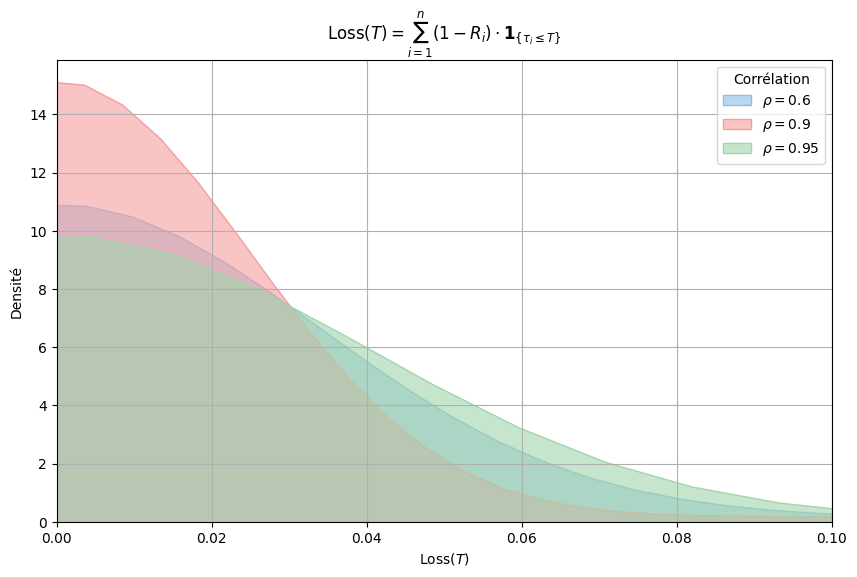

In [110]:
# Paramètres
T = 1
rho_values = [0.6, 0.9, 0.95]
n_simulations = 100

# Couleurs pastel pour meilleure lisibilité en superposition
colors = ['#8dbde4', '#f49e9e', '#a2d5ab']

plt.figure(figsize=(10, 6))

for rho, color in zip(rho_values, colors):
    losses = []
    for _ in range(n_simulations):
        loss, _, _ = simul_loss(params, T, rho)
        losses.append(loss)
    losses = np.array(losses)
    
    sns.kdeplot(
        losses,
        fill=True,
        bw_adjust=0.5,
        alpha=0.6,           # Opacité semi-transparente
        linewidth=1,         # Courbes fines
        label=fr"$\rho = {rho}$",
        color=color
    )

# Mise en forme
plt.title(r"$\text{Loss}(T) = \sum_{i=1}^{n} (1 - R_i) \cdot \mathbf{1}_{\{\tau_i \leq T\}}$")
plt.xlabel(r"$\text{Loss}(T)$")
plt.ylabel("Densité")
plt.xlim(0, 0.1)
plt.legend(title="Corrélation")
plt.grid(True)
plt.show()


$$
\text{CreditVaR}(\alpha) = \inf \left\{ L : \mathbb{P}\left( L(t) \leq L \right) \geq \alpha \right\}
$$

In [131]:
# ====================== Fonction quantile ====================== #

def quantile_loss(params, T, rho, alpha, N):
    """
    Évalue le quantile alpha de la perte agrégée selon un modèle de copule gaussienne.

    Arguments :
    - params : matrice (n x 3), paramètres Vasicek (k, theta, sigma) pour chaque entité
    - T : horizon temporel
    - rho : corrélation de la copule gaussienne
    - alpha : niveau de quantile
    - N : nombre de simulations Monte Carlo

    Retourne :
    - q_Loss : quantile alpha de la distribution de perte
    """

    liste_loss = []

    for k in range(N):
        loss, _, _ = simul_loss(params, T, rho)
        liste_loss.append(loss)

    liste_loss = np.array(liste_loss)

    # Tri des pertes
    liste_loss.sort()

    # Calcul de l'indice du quantile (continue à gauche)
    index = int(np.ceil(N * alpha)) - 1  # -1 car Python indexe à partir de 0
    q_Loss = liste_loss[index]

    return q_Loss

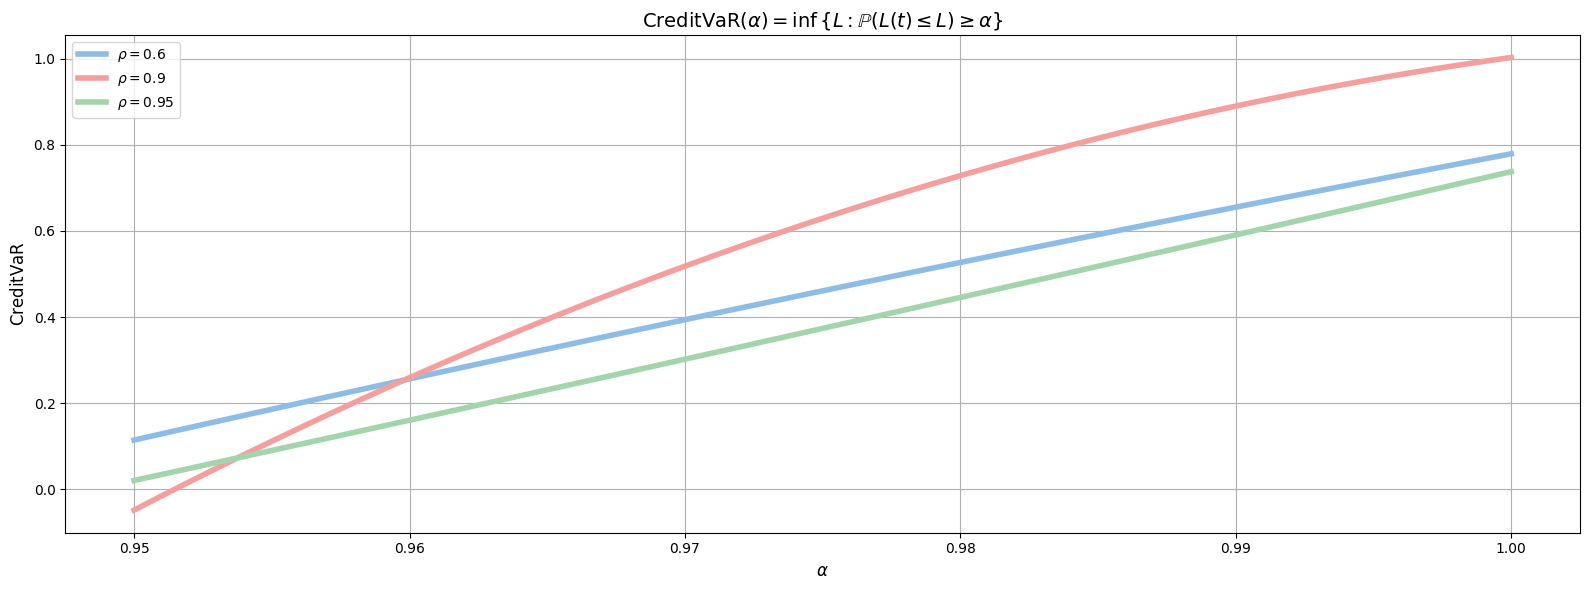

In [112]:
# ========================== Paramètres ========================== #
T = 1
rho_values = [0.6, 0.9, 0.95]
n_simulations = 100
colors = ['#8dbde4', '#f49e9e', '#a2d5ab']

# Valeurs de alpha pour le tracé (de 95% à 1%)
alphas = np.linspace(0.95, 1, 20)

# ========================== Tracé ========================== #
plt.figure(figsize=(16, 6))

for rho, color in zip(rho_values, colors):
    # Simule les quantiles sur la grille d'alphas
    q_vals = [quantile_loss(params, T, rho, alpha, n_simulations) for alpha in alphas]

    # Fit d’un polynôme de degré 3 (trop de variance avec monte carlo): y = a3*α^3 + a2*α^2 + a1*α + a0 
    coeffs = np.polyfit(alphas, q_vals, deg=2)

    # Grille lisse pour le tracé de la courbe
    alphas_fit = np.linspace(alphas.min(), alphas.max(), 200)
    q_vals_fit = np.polyval(coeffs, alphas_fit)

    # Tracé de la courbe sans points
    plt.plot(alphas_fit, q_vals_fit, label=f"$\\rho = {rho}$", color=color, linewidth=4)

# Mise en forme
plt.title(r"$\text{CreditVaR}(\alpha) = \inf \left\{ L : \mathbb{P}\left( L(t) \leq L \right) \geq \alpha \right\}$", fontsize=14)
plt.xlabel(r"$\alpha$", fontsize=12)
plt.ylabel(r"$\text{CreditVaR}$", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.2 Distribution des tranches

On va considérer 3 tranches :

- Tranche Junior : $[0\%, 7\%]$

- Tranche Mezzanine : $[7\%, 15\%]$

- Tranche Senior : $[15\%, 30\%]$

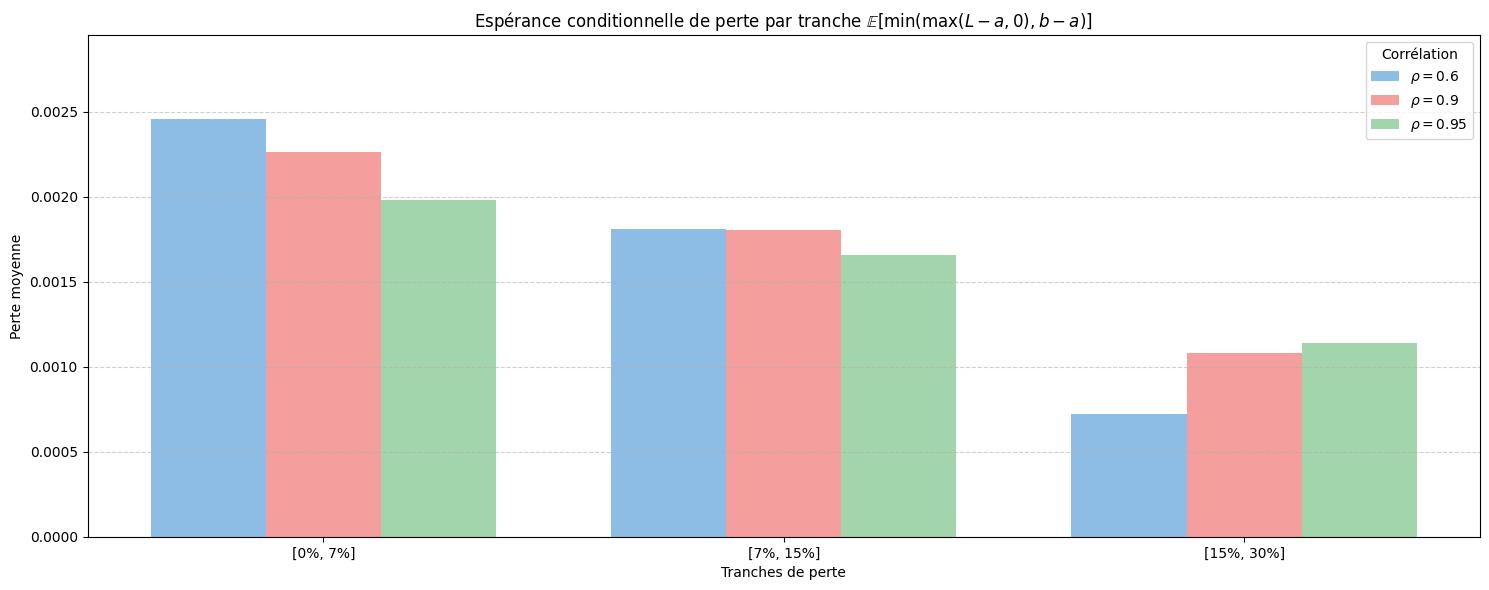

In [ ]:
# ========================== Distribution des tranches ========================== #

# Paramètres
T = 1
rho_values = [0.6, 0.9, 0.95]
rho_labels = [r'$\rho = 0.6$', r'$\rho = 0.9$', r'$\rho = 0.95$']
colors = ['#8dbde4', '#f49e9e', '#a2d5ab']
n_simulations = 10000

# Tranches
tranche_bounds = [(0.00, 0.07), (0.07, 0.15), (0.15, 0.30)]
tranche_labels = ['[0%, 7%]', '[7%, 15%]', '[15%, 30%]']

# Pour stocker les espérances par tranche et par rho
expected_losses = np.zeros((len(rho_values), len(tranche_bounds)))

for i, rho in enumerate(rho_values):
    tranche_losses = np.zeros((n_simulations, len(tranche_bounds)))

    for j in range(n_simulations):
        loss, _, _ = simul_loss(params, T, rho)
        pourcent_loss = loss / len(params)

        for k, (a, b) in enumerate(tranche_bounds):
            tranche_losses[j, k] = np.minimum(np.maximum(pourcent_loss - a, 0), b - a)

    # Moyenne sur les simulations
    expected_losses[i] = tranche_losses.mean(axis=0)

# ===========================
# Barplot
# ===========================
bar_width = 0.25
x = np.arange(len(tranche_bounds))  # indices des tranches

plt.figure(figsize=(15, 6))

for i in range(len(rho_values)):
    plt.bar(
        x + i * bar_width,
        expected_losses[i],
        width=bar_width,
        label=rho_labels[i],
        color=colors[i]
    )

# Mise en forme
plt.xticks(x + bar_width, tranche_labels)
plt.xlabel("Tranches de perte")
plt.ylabel("Perte moyenne")
plt.title(r"Espérance conditionnelle de perte par tranche $\mathbb{E}[\min(\max(L - a, 0), b - a)]$")
plt.legend(title="Corrélation")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, np.max(expected_losses) * 1.2)

plt.tight_layout()
plt.show()

## 4.2 Base correlation : Perturbation du modèle gaussien

Plutôt que de supposer un coefficient de corrélation constant $\rho$, nous introduisons une fonction décroissante du facteur de marché $V$, notée $\beta(V)$, qui modifie la structure de dépendance. La variable latente $X_i$ pour chaque entité est alors modélisée comme suit :
$$
X_i = \beta(V) V + \sqrt{1 - \| \beta(V) \|^2} \, V_i
$$
où $V$ est le facteur de risque systémique, $V_i$ un facteur idiosyncratique indépendant, et $\beta(V)$ joue le rôle de corrélation locale dépendante du facteur.

La paramétrisation choisie pour $\beta(x)$ est la suivante :
$$
\beta(x) = 
\begin{cases}
1 - (1 - \sqrt{\rho}) e^{- \frac{1}{2} \alpha x^2} & \text{si } x < 0 \\
\sqrt{\rho} & \text{si } x \geq 0
\end{cases}
$$

In [279]:
# ====================== Fonction Beta ====================== #

def Beta(x, alpha, rho): 
    """
    Fonction Beta de perturbation du modèle gaussien.

    Arguments :
    - x : variable
    - alpha : paramètre d'atténuation du facteur de marché
    - rho : paramètre de corrélation

    Retourne :
    - Beta : sortie de la fonction Beta
    """
    if x <= 0:
        return 1 - (1 - np.sqrt(rho)) * np.exp(-0.5 * alpha * (x**2))
    
    else :
        return np.sqrt(rho)

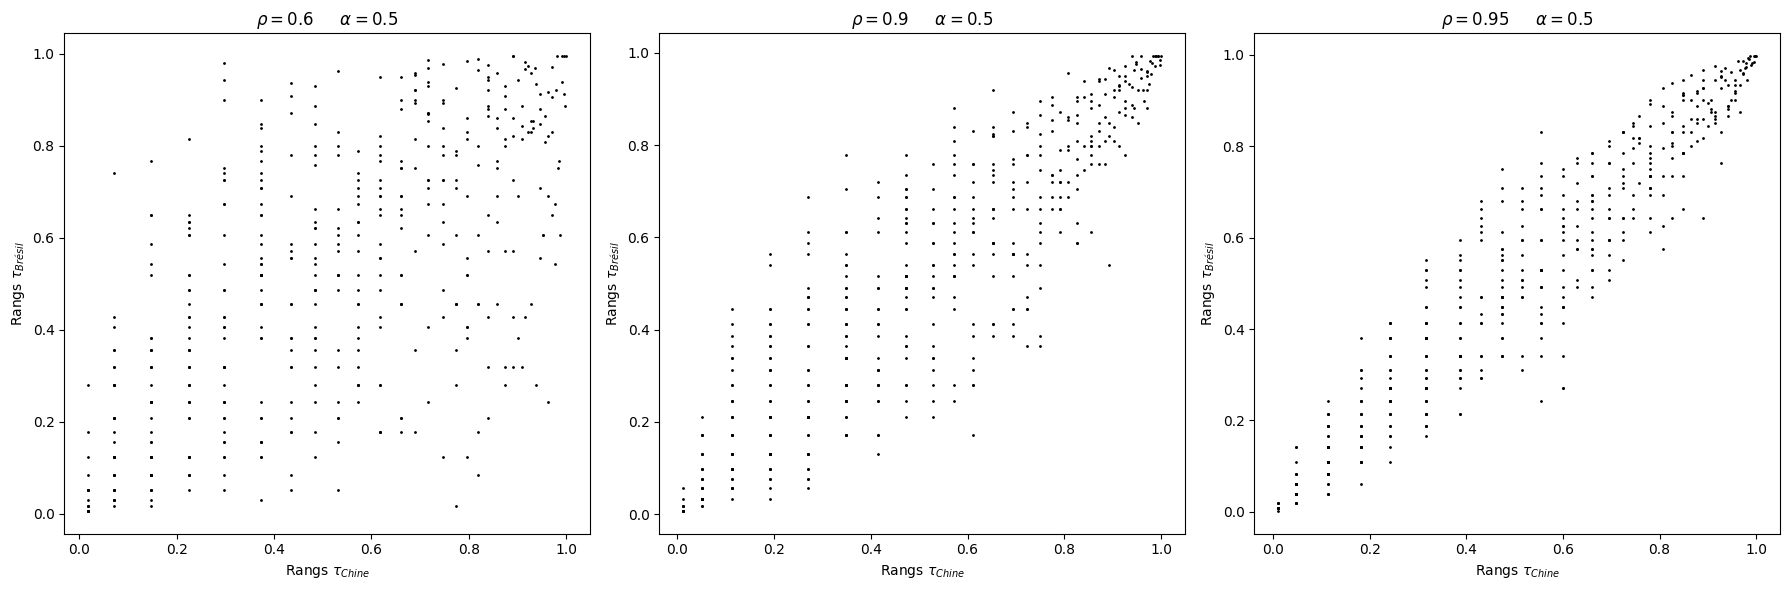

In [282]:
# ====================== Simulation de n instants de défauts corrélés ====================== #

def simul_defaut_corr_rank_v2(params, T, alpha, rho): 
    """
    Simule n instants de défaut selon le modèle de copule gaussienne à un facteur.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - alpha : paramètre d'atténuation du facteur de marché
    - rho : paramètre de corrélation de la copule gaussienne

    Retourne :
    - tau : vecteur des instants de défaut (ou T si aucun défaut avant l'échéance)
    """
    
    n = params.shape[0]  # Nombre d'actifs
    N = int(T * 100)     # Nombre de pas de temps
    dt = T / N           # Pas de temps

    # Extraction des paramètres du modèle Vasicek
    kappa, theta, sigma = params[:, 0], params[:, 1], params[:, 2]

    # Simulation de la copule gaussienne
    V_vecteur = np.random.randn(n)          # Part idiosyncratique
    V = np.random.randn()                   # Facteur de marché
    X = Beta(V, alpha, rho) * V + np.sqrt(1 - (Beta(V, alpha, rho))**2) * V_vecteur
    Xi = 1 - norm.cdf(X)                    # Probabilité de défaut
    mu = -np.log(Xi)                        # Seuil de défaut

    # Initialisation
    lambdas = np.zeros((N, n))  # Processus Vasicek
    int_lambda = np.zeros(n)  
    resultats = np.full(n, T)   # Par défaut, T si aucun défaut
    vecteur_bool = np.ones(n, dtype=bool)  

    # Simulation du processus Vasicek avec schéma d'Euler
    for i in range(1, N):
        brownien = np.random.randn(n)
        lambdas[i] = lambdas[i-1] + kappa * (theta - lambdas[i-1]) * dt + sigma * np.sqrt(dt) * brownien
        int_lambda += lambdas[i] * dt

        # Test de défaut
        defauts = (int_lambda > mu) & vecteur_bool
        resultats[defauts] = i * dt  # Instant du défaut
        vecteur_bool[defauts] = False  

    return resultats, vecteur_bool


# ====================== Paramètres et simulation ====================== #

params_QQ = params[:2, :]  # Garde uniquement les deux premières lignes

T = 100  # Échéance longue
rho_values = [0.6, 0.9, 0.95]  # Différentes corrélations
alpha = 0.8
N_simulations = 500  # Nombre de simulations

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 subplots en ligne

for i, rho in enumerate(rho_values):
    # Stockage des rangs
    rangs_x, rangs_y = [], []

    for _ in range(N_simulations):
        tau, _ = simul_defaut_corr_rank_v2(params, T, alpha, rho)
        rangs_x.append(tau[0])
        rangs_y.append(tau[1])

    # Normalisation des rangs (division par le nombre total d’observations)
    rangs_x = rankdata(rangs_x) / N_simulations
    rangs_y = rankdata(rangs_y) / N_simulations

    # Rank-Rank Plot
    axes[i].scatter(rangs_x, rangs_y, color='black', marker='o', s=1)
    axes[i].set_xlabel("Rangs $\\tau_{Chine}$")
    axes[i].set_ylabel("Rangs $\\tau_{Brésil}$")
    axes[i].set_title(f"$\\rho = {rho}$     $\\alpha = 0.5$")

plt.tight_layout()
#plt.savefig("07_rrplot.png", dpi=300, bbox_inches='tight')
plt.show()

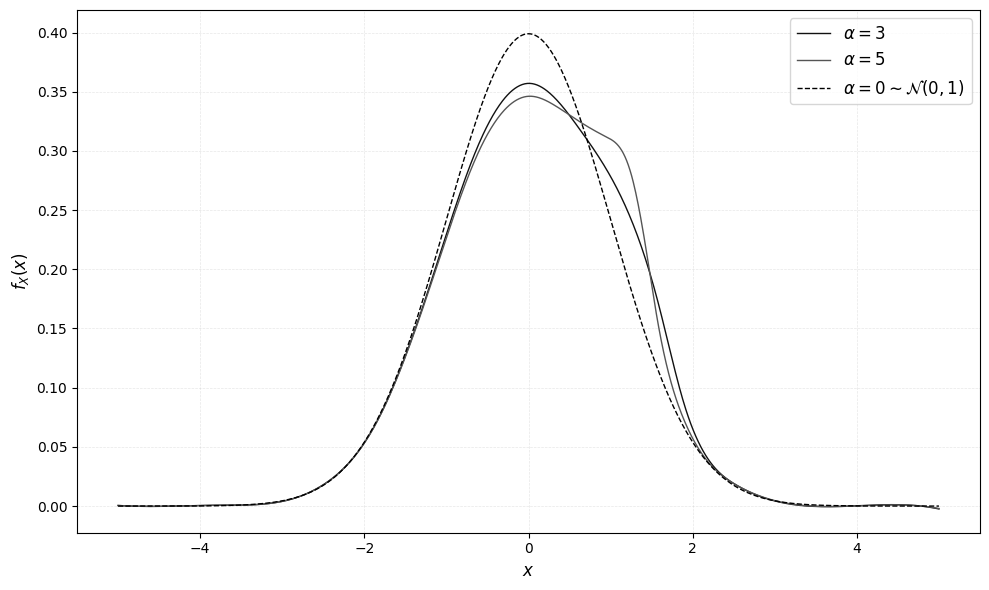

In [ ]:
# ====================== Densités ====================== #

# Fonction Beta
def Beta(x, alpha, rho): 
    x = np.asarray(x)
    perturbed = 1 - (1 - np.sqrt(rho)) * np.exp(-0.5 * alpha * x**2)
    return np.where(x <= 0, perturbed, np.sqrt(rho))

# Paramètres
n = 10_000_000
rho = 0.5
alphas = [3, 5]
x_grid = np.linspace(-5, 5, 1000)

# Base commune
np.random.seed(42)
V = np.random.randn(n)
eps = np.random.randn(n)

# Nuances de gris
colors = ['#111111', '#555555', '#AAAAAA']

# Figure
plt.figure(figsize=(10, 6))

for alpha, color in zip(alphas, colors):
    beta_V = Beta(V, alpha, rho)
    X = beta_V * V + np.sqrt(1 - beta_V**2) * eps

    # Approximation de la densité par dérivée de la CDF
    X_sorted = np.sort(X)
    F_X = np.searchsorted(X_sorted, x_grid, side='right') / n
    f_X_raw = np.gradient(F_X, x_grid)

    # Lissage via spline
    spline = UnivariateSpline(x_grid, f_X_raw, s=1e-3)
    f_X_smooth = spline(x_grid)

    plt.plot(x_grid, f_X_smooth, color=color, label=fr"$\alpha = {alpha}$", linewidth=1)

# Densité normale standard (référence)
plt.plot(x_grid, norm.pdf(x_grid), '--', color='black', label=r"$\alpha = 0 \sim \mathcal{N}(0,1)$", linewidth=1)

# Plot settings
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$f_X(x)$", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.savefig("08_densite.png", dpi=300)
plt.show()

## 4.3 Ajustement sur Itraxx

In [226]:
# ====================== Simulation de n instants de défauts corrélés : Perturbation gaussienne ====================== #

def simul_defaut_corr_v2(params, T, alpha, rho): 
    """
    Simule n instants de défaut selon le modèle de copule gaussienne à un facteur perturbé.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - alpha : paramètre d'atténuation du facteur de marché
    - rho : paramètre de corrélation de la copule gaussienne

    Retourne :
    - tau : vecteur des instants de défaut (ou T si aucun défaut avant l'échéance)
    """

    # Initialisation des variables
    n = params.shape[0]  # Nombre d'actifs
    N = T * 100          # Nombre de pas de temps
    dt = T / N           # Pas de temps

    # Extraction des paramètres du modèle Vasicek
    vecteur_k = params[:, 0]      # Vitesse de réversion
    vecteur_theta = params[:, 1]  # Moyenne long terme
    vecteur_sigma = params[:, 2]  # Volatilité

    # Processus Vasicek initialisé à 0
    lambdas = np.zeros((N, n))  

    # Simulation de la copule gaussienne
    V_vecteur = np.random.randn(n)         # Part idiosyncratique
    V = np.random.randn()                  # Facteur de marché
    X = Beta(V, alpha, rho) * V + np.sqrt(1 - (Beta(V, alpha, rho))**2) * V_vecteur
    Xi = 1 - norm.cdf(X, loc=0, scale=1)   # Probabilité inverse du défaut
    mu = -np.log(Xi)                       # Seuil de défaut

    # Initialisation des intégrales et du vecteur de défauts
    int_lambda = np.zeros(n)  
    resultats = np.full(n, float(T))       # Valeurs par défaut à T
    vecteur_bool = np.ones(n, dtype=bool)  # Indique si un défaut a eu lieu

    # Simulation du processus Vasicek avec schéma d'Euler
    for i in range(1, N):
        brownien = np.random.randn(n)
        lambdas[i] = (lambdas[i-1] + 
                      vecteur_k * (vecteur_theta - lambdas[i-1]) * dt + 
                      vecteur_sigma * np.sqrt(dt) * brownien)

        int_lambda += lambdas[i] * dt

        # Test de défaut pour chaque actif
        defauts = (int_lambda > mu) & vecteur_bool
        resultats[defauts] = i * dt  # Instant du défaut
        vecteur_bool[defauts] = False  # Marquer comme ayant défauté

    return resultats, vecteur_bool

In [379]:
# ====================== Simulation de n instants de défauts corrélés ====================== #

def simul_loss_v2(params, T, alpha, rho): 
    """
    Simule une perte sur une période T.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - alpha : paramètre d'atténuation du facteur de marché
    - rho : paramètre de corrélation de la copule gaussienne perturbé

    Retourne :
    - Loss : Montant de la perte
    """
    
    alpha, beta_param = 0.4, 0.26  # Paramètres de la loi Beta (perte en cas de défaut)

    # Simulation des instants de défaut (ou indicatrices de défaut à T)
    tau_vect, vect_bool = simul_defaut_corr_v2(params, T, alpha, rho)  # vect_bool[i] = True si défaut avant T

    # Nombre d'entités en défaut
    n_defaults = np.sum(~vect_bool)  # Tilde pour inverser le vecteur de booléens

    # Simule les pertes associées aux entités en défaut : (1 - R)
    # où R ~ Beta(alpha, beta)
    if n_defaults > 0:
        R_losses = stats.beta.rvs(alpha, beta_param, size=n_defaults)
        losses = 1 - R_losses
        loss = np.sum(losses)
    else:
        loss = 0.0

    return loss, tau_vect, vect_bool


def simul_loss_v2_percent(params, T, alpha, rho):
    """
    Simule une perte en pourcentage sur une période T.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - alpha : paramètre d'atténuation du facteur de marché
    - rho : paramètre de corrélation de la copule gaussienne perturbé

    Retourne :
    - Loss : Montant de la perte
    """

    loss, _, _ = simul_loss_v2(params, T, alpha, rho)

    return (1/len(params)) * loss

$$
fonction \space call(k) = \mathbb{E}\left[(Loss_t - k)^+\right]
$$

$$
call \space spread (\alpha_i, \alpha_{i-1}) = Perte \space equity(\alpha_i) - Perte \space equity(\alpha_{i-1}) = \mathbb{E}\left[(Loss_t - \alpha_{i-1})^+ - (Loss_t - \alpha_{i})^+\right]
$$

In [431]:
# ====================== Fonctions qui évalue le spread d'une tranche équity ====================== #

def average_call(params, T, alpha, rho, seuil, N):
    """
    Donne l'espérance de perte pour une tranche equity.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - alpha : paramètre d'atténuation du facteur de marché
    - rho : paramètre de corrélation de la copule gaussienne perturbée
    - seuil : seuil de détachement de la tranche
    - N : nombre d'itérations Monte Carlo

    Retourne :
    - Loss : espérance de la perte de la tranche equity
    """
    Losses = []

    for _ in range(N):
        loss = simul_loss_v2_percent(params, T, alpha, rho)
        Losses.append(np.maximum(0, loss - seuil)) 

    return np.mean(Losses)

def average_tranche(params, T, alpha, rho, seuil_inf, seuil_sup, N):
    """
    Donne l'espérance de perte pour une tranche quelconque.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - alpha : paramètre d'atténuation du facteur de marché
    - rho : paramètre de corrélation de la copule gaussienne perturbée
    - seuil_inf : seuil de commencement de la tranche
    - seuil_sup : seuil de détachement de la tranche
    - N : nombre d'itérations Monte Carlo

    Retourne :
    - Loss : espérance de la perte de la tranche
    """

    return average_call(params, T, alpha, rho, seuil_inf, N) - average_call(params, T, alpha, rho, seuil_sup, N)

In [432]:
# Params 

T = 1
seuil = 0.08
rho_fixe = 0.15
N = 100_00
alpha = 0.5

loss = average_call(params, T, alpha, rho_fixe, seuil, N)

print(loss)

0.003473608340516999


## 4.3 Calibration sur iTraxx (à revoir, fonctionne mal)

In [ ]:
# ====================== Fonctions pour retrouver la base correlation par dichotomie ====================== #

# Paramètres
Liste_seuil = [0, 0.06, 0.08, 0.1]
N = 10_000
alpha = 0.5
rho_fixe = 0.15

# Résultats du modèle gaussien perturbé
liste_targets = []

for k in range (1, Liste_seuil):
    loss = average_tranche(params, T, alpha, rho_fixe, Liste_seuil[k-1], Liste_seuil[k], N)
    liste_targets.append(loss)

# Recherche de la base correlation par dichotomie
rho_liste = []

for k in range (1, Liste_seuil):
    target_loss = liste_targets[i - 1]

    # Fonction objectif : différence entre la perte avec rho et la perte cible
    def objectif(rho):
        return average_tranche(params, T, alpha = 0, rho_fixe, Liste_seuil[k-1], Liste_seuil[k], N)

    # Résolution par dichotomie dans [1e-3, 0.999]
    rho_sol = brentq(objectif, 1e-3, 0.999, xtol=1e-3)
    rho_liste.append(rho_sol)

# Tracé de la base correlation
plt.figure(figsize=(8, 5))
plt.plot(Liste_seuil, rho_liste, marker='x', linestyle='-', color='black')
plt.xlabel("Seuil de la tranche equity")
plt.ylabel("Base correlation")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("base_correlation_curve.png", dpi=300)
plt.show()

In [ ]:
# ====================== Fonctions pour retrouver la base correlation par dichotomie ====================== #

# Paramètres
Liste_seuil = [0, 0.06, 0.08, 0.1]
N = 1000
alpha = 0.5
rho_fixe = 0.15  # utilisé pour le modèle cible (perturbé)

# Résultats du modèle gaussien perturbé (cible)
liste_targets = []

# Calcul des pertes moyennes cibles (avec rho_fixe et alpha)
for k in range(1, len(Liste_seuil)):
    loss = average_tranche(params, T, alpha, rho_fixe, Liste_seuil[k-1], Liste_seuil[k], N)
    liste_targets.append(loss)

# Recherche de la base correlation par dichotomie (alpha = 0)
rho_liste = []

for k in range(1, len(Liste_seuil)):
    target_loss = liste_targets[k - 1]

    # Fonction objectif : différence entre la perte simulée (avec rho) et la cible
    def objectif(rho):
        loss = average_tranche(params, T, alpha=0, rho=rho, 
                               seuil_inf=Liste_seuil[k-1], seuil_sup=Liste_seuil[k], N=N)
        return loss - target_loss

    # Résolution de rho par dichotomie dans l'intervalle [1e-3, 0.999]
    try:
        rho_sol = brentq(objectif, 1e-3, 0.999, xtol=1e-3)
    except ValueError:
        rho_sol = np.nan  # en cas d’échec (ex : la fonction ne change pas de signe)
    
    rho_liste.append(rho_sol)

# Tracé de la base correlation
plt.figure(figsize=(8, 5))
x_seuils = Liste_seuil[1:]  # on trace uniquement les tranches non-nulles
plt.plot(x_seuils, rho_liste, marker='x', linestyle='-', color='black')
plt.xlabel("Seuil de la tranche equity")
plt.ylabel("Base correlation")
plt.title("Courbe de base correlation par tranche")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("base_correlation_curve.png", dpi=300)
plt.show()

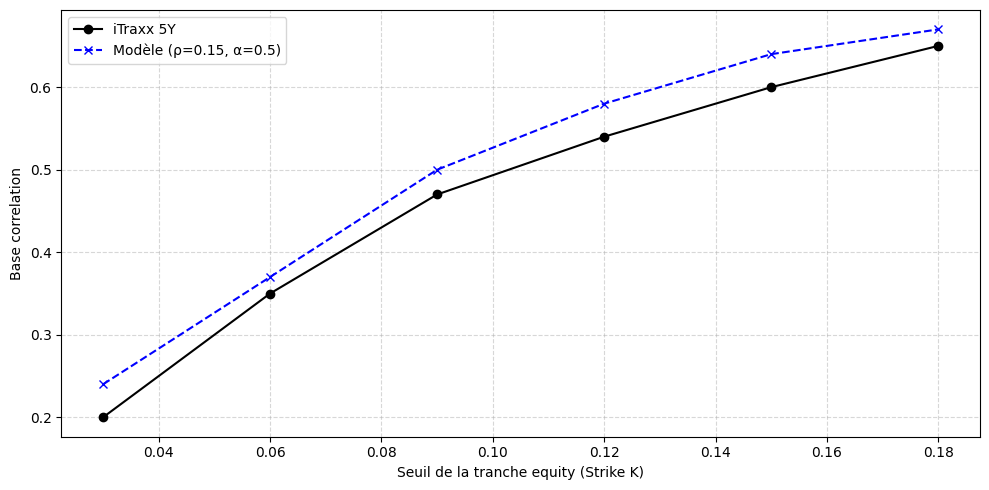

In [ ]:
# Seuils des tranches equity
Liste_seuil = [0.03, 0.06, 0.09, 0.12, 0.15, 0.18]

# Données iTraxx (trouvées sur un mémoire)
rho_liste_itraxx = [0.2, 0.35, 0.47, 0.54, 0.60, 0.65]

# Données du modèle (rho = 0.15, alpha = 0.5)
rho_liste_modele = [0.24, 0.37, 0.50, 0.58, 0.64, 0.67]

# Tracé de la base correlation
plt.figure(figsize=(10, 5))
plt.plot(Liste_seuil, rho_liste_itraxx, marker='o', linestyle='-', label='iTraxx 5Y', color='black')
plt.plot(Liste_seuil, rho_liste_modele, marker='x', linestyle='--', label='Modèle (ρ=0.15, α=0.5)', color='blue')

plt.xlabel("Seuil de la tranche equity (Strike K)")
plt.ylabel("Base correlation")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
# plt.savefig("09_base_correlation_curve.png", dpi=300)
plt.show()


## 4.4 Evaluation des spreads

$$
\mathbb{E}_* \left( k_j \left( 1 - \frac{\text{Loss}_{\%}(T)^{(j)}}{\alpha_j - \alpha_{j-1}} \right) D(0, T) \right) = 1
\quad \Rightarrow \quad
k_j = \frac{1}{\left( 1 - \frac{\mathbb{E}_* \left[\text{Loss}_{\%}(T)^{(j)}\right]}{\alpha_j - \alpha_{j-1}} \right) D(0, T)}
$$

On suppose $r = 2\% $ constant

In [446]:
# ====================== Fonctions Evaluer le taux de coupon k ====================== #

def rate_tranche(params, T, alpha, rho, seuil_inf, seuil_sup, N):
    """
    Donne le taux de coupon de la tranche.

    Arguments :
    - params : matrice de paramètres (n x 3) des processus Vasicek (k, theta, sigma)
    - T : échéance
    - alpha : paramètre d'atténuation du facteur de marché
    - rho : paramètre de corrélation de la copule gaussienne perturbée
    - seuil_inf : seuil de commencement de la tranche
    - seuil_sup : seuil de détachement de la tranche
    - N : nombre d'itérations Monte Carlo

    Retourne :
    - rate : retourne de taux de coupon de la tranche
    """

    # Ecriture de la formule ci dessus
    mean_loss = average_tranche(params, T, alpha, rho, seuil_inf, seuil_sup, N)
    mean_loss *= 1/(seuil_sup - seuil_inf)

    k = (1 - mean_loss) * np.exp(-0.03 * T)
    k = 1/k

    return k, mean_loss

In [448]:
# ====================== Affichage des coupons de tranches ====================== #

# Paramètres communs
T = 1                       # Échéance 
alpha = 0.5                 # Perturbation facteur de marché
rho = 0.15                  # Corrélation de la copule
N = 100000                   # Nombre de simulations Monte Carlo

# Seuils de tranches
Liste_seuils = [0, 0.03, 0.06, 0.12, 0.22, 1.00]
n_tranches = len(Liste_seuils) - 1
noms_tranches = ['Equity', 'Junior', 'Mezzanine 1', 'Mezzanine 2', 'Senior']

# Calcul des taux de chaque tranche
taux_tranches = []
perte_mean = []

for i in range(n_tranches):
    seuil_inf = Liste_seuils[i]
    seuil_sup = Liste_seuils[i + 1]
    taux, mean_loss = rate_tranche(params, T, alpha, rho, seuil_inf, seuil_sup, N)
    # mean_loss = average_tranche(params, T, alpha, rho, seuil_inf, seuil_sup, N)
    taux_tranches.append(taux)
    perte_mean.append(mean_loss)

# Création du DataFrame pour affichage
df_tranches = pd.DataFrame({
    'Tranche': noms_tranches,
    'Seuil Inf.': Liste_seuils[:-1],
    'Seuil Sup.': Liste_seuils[1:],
    'Coupon (%)': [round(100 * k, 2) for k in taux_tranches],
    'perte (%)': [round(100 * k, 2) for k in perte_mean]
})

# Affichage
print(df_tranches.to_string(index=False))

    Tranche  Seuil Inf.  Seuil Sup.  Coupon (%)  perte (%)
     Equity        0.00        0.03      109.45       5.85
     Junior        0.03        0.06      107.37       4.03
Mezzanine 1        0.06        0.12      106.92       3.62
Mezzanine 2        0.12        0.22      104.87       1.74
     Senior        0.22        1.00      103.09       0.04


<a id='5'></a>
# 5. Comparaison analytique : Approche portefeuille homogène

On cherche à obtenir une expression analytique de  

$$
\mathbb{E}_{\mathbb{Q}}\big[(Loss_{\%}(T)-\alpha_j)_+\big]
$$

dans le cas d’un portefeuille homogène, afin de comparer avec les résultats Monte-Carlo et de réduire le temps de calcul.

---


Chaque variable latente de défaut est modélisée par :

$$
X_i = \beta(V)V + \sqrt{1-\|\beta(V)\|^2}\,V_i
$$

où :

- $V$ : facteur systémique,
- $(V_i)$ : risques idiosyncratiques i.i.d.,
- $V, V_i \sim \mathcal{N}(0,1)$ indépendants.

La copule gaussienne associée est :

$$
C(u_1,\dots,u_n)
=
\mathbb{Q}\big(X_1<\Phi^{-1}(u_1),\dots,X_n<\Phi^{-1}(u_n)\big).
$$

Par le théorème de Sklar :

$$
\mathbb{Q}(\tau_1<t_1,\dots,\tau_n<t_n)
=
C(P^1(t_1),\dots,P^n(t_n)).
$$

---


Conditionnellement à $V=v$ :

$$
P^i_{V=v}(t)
=
\mathbb{Q}(\tau_i \le t \mid V=v)
=
\Phi\!\left(
\frac{\Phi^{-1}(P^i(t))-\beta(v)v}
{\sqrt{1-\|\beta(v)\|^2}}
\right).
$$

---


On suppose :

- mêmes lois marginales : $P^i(t)=p_t$,
- indépendance conditionnelle donnée $V$.

Le nombre de défauts

$$
N_t^n=\sum_{i=1}^n \mathbf{1}_{\{\tau_i\le t\}}
$$

vérifie alors :

$$
N_t^n \mid V=v \sim \mathcal{B}(n,p_t(v)).
$$

Donc :

$$
\mathbb{Q}(N_t^n=k\mid V=v)
=
\binom{n}{k} p_t(v)^k (1-p_t(v))^{n-k}.
$$

En intégrant sur $V$ :

$$
\mathbb{Q}(N_t^n=k)
=
\int_{\mathbb{R}}
\binom{n}{k} p_t(v)^k (1-p_t(v))^{n-k}
\varphi(v)\,dv.
$$

---


La perte relative est :

$$
Loss_{\%}(T)
=
\frac{1-R}{N}\,N_T^n,
$$

où $R$ suit une loi Beta de densité $f_R$.

On cherche :

$$
\mathbb{E}_{\mathbb{Q}}\big[(Loss_{\%}(T)-\alpha_j)_+\big].
$$

En conditionnant par $R$ puis par $N_T^n$ :

$$
\mathbb{E}_{\mathbb{Q}}[(Loss_{\%}(T)-\alpha_j)_+]
=
\int_{\Omega_R}
\sum_{k=0}^n
\left(
\frac{1-r}{N}k-\alpha_j
\right)_+
\mathbb{Q}(N_T^n=k)\,
f_R(r)\,dr.
$$

Cette formule donne une expression analytique exploitable numériquement.

---


La perte de tranche s’écrit :

$$
Loss_{\%}^{(j)}(T)
=
(Loss_{\%}(T)-\alpha_{j-1})_+
-
(Loss_{\%}(T)-\alpha_j)_+.
$$

Le taux de coupon est alors :

$$
k_j
=
\frac{1}{
\left(
1-\dfrac{\mathbb{E}_{\mathbb{Q}}[Loss_{\%}^{(j)}(T)]}
{\alpha_j-\alpha_{j-1}}
\right) D(0,T)
}.
$$

In [519]:
# ====================== Fonctions proba marginale uniforme ====================== #

def p(t):
    """
    Donne la proba marginale de défaut.

    Arguments :
    - t : temps

    Retourne :
    - proba : proba de défaut
    """
    proba = 1 - np.exp(- (1/70) * t)

    return proba

$$
\beta(x) = 
\begin{cases}
1 - (1 - \sqrt{\rho}) e^{- \frac{1}{2} \alpha x^2} & \text{si } x < 0 \\
\sqrt{\rho} & \text{si } x \geq 0
\end{cases}
$$

In [520]:
# ====================== Fonction Beta ====================== #

def Beta(x): 
    """
    La fonction de corrélation du modèle gaussien perturbé

    Arguments :
    - X : argument, risque systémique

    Retourne :
    - Beta : corrélation
    """
    x = np.asarray(x)
    perturbed = 1 - (1 - np.sqrt(0.15)) * np.exp(-0.5 * 0.5 * x**2)
    return np.where(x <= 0, perturbed, np.sqrt(rho))

$$
P^i_{V = v}(t) 
=
\Phi\left(\frac{ \Phi^{-1}(P^i(t)) - \beta(v) v }{ \sqrt{1 - \| \beta(v) \|^2} }\right)
$$

In [521]:
# ====================== Fonctions proba de défaut conditionnelle ====================== #

def conditional_default_prob(t, v):
    """
    Calcule la probabilité de défaut conditionnelle donnée v :
    
    Φ((Φ⁻¹(Pᵢ(t)) - β(v)·v) / sqrt(1 - ||β(v)||²))

    Arguments :
    - t : float, temps
    - v : array_like, facteur(s) commun(s)

    Retourne :
    - proba conditionnelle de défaut donnée v
    """
    p_i_t = p(t)                     # P^i(t)
    quantile = norm.ppf(p_i_t)       # Φ⁻¹(P^i(t))
    
    b = Beta(v)                      # Peut être scalaire ou vecteur
    b_dot_v = np.dot(b, v) if hasattr(b, '__len__') else b * v
    b_norm_sq = np.sum(np.square(b)) if hasattr(b, '__len__') else b ** 2

    denom = np.sqrt(1 - b_norm_sq)
    arg = (quantile - b_dot_v) / denom
    
    return norm.cdf(arg)

$$
\mathbb{Q}(N_t^n = k) = \int_{\mathbb{R}} \binom{n}{k} 
(P_{V = v}(t))^k 
\left( 1 - P_{V = v}(t)  \right)^{n-k} 
\varphi(v)\, dv
$$

In [522]:
# ====================== Fonctions Loi de N (nombre de défauts) ====================== #

def q_N_eq_k(t, n, k):
    """
    Calcule Q(N_t^n = k) via l'intégrale :
    ∫ binom(n, k) * p_v(t)^k * (1 - p_v(t))^{n-k} * φ(v) dv

    Arguments :
    - t : float, temps
    - n : int, taille du portefeuille
    - k : int, nombre de défauts

    Retourne :
    - probabilité Q(N_t^n = k)
    """

    def integrand(v):
        p_v = conditional_default_prob(t, v)
        binom_term = comb(n, k)
        return binom_term * (p_v ** k) * ((1 - p_v) ** (n - k)) * norm.pdf(v)

    # Intégration sur un support large autour de 0 (ex. [-6σ, +6σ])
    result, _ = quad(integrand, -6, 6, epsabs=1e-10)

    return result

$$
E_{\mathbb{Q}}[(\text{Loss}_{\%}(T) - \alpha_{j})_{+}]
=
 \int_{\Omega_R} \sum_{k=0}^{n}
 \left[
\left(\frac{1 - r}{N} \cdot k - \alpha_{j}\right)_{+}
\mathbb{Q}(N_t^n = k)
 \right]
 f_R(r)\, dr
 $$

In [523]:
# ====================== Fonctions espérance call ====================== #

def expected_tranche_loss(t, n, alpha_j, a=0.40, b=0.26):
    """
    Calcule l'espérance de (Loss% - alpha_j)_+ intégrée sur R ~ Beta(a, b)

    Arguments :
    - t : temps
    - n : taille du portefeuille (nombre d'entités)
    - alpha_j : attachment point (seuil de la tranche)
    - a, b : paramètres de la loi Beta de R

    Retourne :
    - Espérance de (Loss% - alpha_j)_+
    """

    def integrand(r):
        f_r = beta.pdf(r, a, b)
        total = 0.0
        for k in range(n + 1):
            q_k = q_N_eq_k(t, n, k)  # Probabilité Q(N_t^n = k)
            loss = ((1 - r) / n) * k
            tranche_loss = max(loss - alpha_j, 0)
            total += tranche_loss * q_k
        return total * f_r

    result, _ = quad(integrand, 0, 1, epsabs=1e-2)
    return result

$$
k_j
=
\frac{1}{\left( 1 - \frac{\mathbb{E}_{\mathbb{Q}} \left[(\text{Loss}_{\%}(T) - \alpha_{j-1})_{+}\right] - \mathbb{E}_{\mathbb{Q}} \left[(\text{Loss}_{\%}(T) - \alpha_{j})_{+}\right]}{\alpha_j - \alpha_{j-1}} \right) D(0, T)} 
$$

In [524]:
# ====================== Paramètres ====================== #

T = 1  # maturité
n = 5  # taille du portefeuille
discount_factor = np.exp(-0.03 * T)

# Seuils et noms des tranches
Liste_seuils = [0, 0.03, 0.06, 0.12, 0.22, 1.00]
noms_tranches = ['Equity', 'Junior', 'Mezzanine 1', 'Mezzanine 2', 'Senior']

# ====================== Calcul des coupons k_j ====================== #

taux_tranches = []

for j in range(1, len(Liste_seuils)):
    alpha_inf = Liste_seuils[j - 1]
    alpha_sup = Liste_seuils[j]

    # Espérance de perte au-dessus de chaque seuil
    E_inf = expected_tranche_loss(T, n, alpha_inf)
    E_sup = expected_tranche_loss(T, n, alpha_sup)

    # Perte moyenne sur la tranche
    tranche_expected_loss = (E_inf - E_sup) / (alpha_sup - alpha_inf)

    # Coupon de la tranche
    kj = 1 / ((1 - tranche_expected_loss) * discount_factor)
    taux_tranches.append(kj)

# ====================== Tableau d'affichage ====================== #

df_tranches = pd.DataFrame({
    'Tranche': noms_tranches,
    'Seuil Inf.': Liste_seuils[:-1],
    'Seuil Sup.': Liste_seuils[1:],
    'Coupon (%)': [round(100 * k, 2) for k in taux_tranches]
})

print(df_tranches)

       Tranche  Seuil Inf.  Seuil Sup.  Coupon (%)
0       Equity        0.00        0.03      109.18
1       Junior        0.03        0.06      107.89
2  Mezzanine 1        0.06        0.12      106.87
3  Mezzanine 2        0.12        0.22      105.10
4       Senior        0.22        1.00      103.27
